In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn import preprocessing  
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

#import dataset
data4 = pd.read_csv("train.csv")

In [2]:
#statics of the numerical variables
data4.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [3]:
#dsataframe information
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
#Filter categorical variables
categorical_columns = [x for x in data4.dtypes.index if data4.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]
#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (data4[col].value_counts())



Frequency of Categories for varible Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

F

In [5]:
#Data cleaning
data4.isnull().sum()



Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
#Impute missing values by mean value.
data4['Item_Weight']=data4['Item_Weight'].fillna(data4['Item_Weight'].mean())
#Impute missing value by mode (max count of values of feature)
data4['Outlet_Size'] = data4['Outlet_Size'].fillna(data4['Outlet_Size'].value_counts().index[0])

In [7]:
data4.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [8]:
#impute all NaNs with 0 as value.
data4.replace(np.nan,0) 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


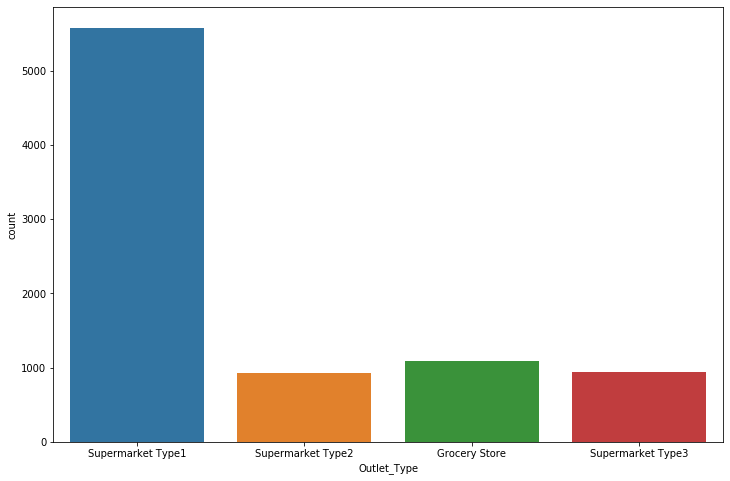

In [9]:
#Visualization
plt.figure(figsize=(12,8))
sns.countplot(data4.Outlet_Type)

In [10]:
data4['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

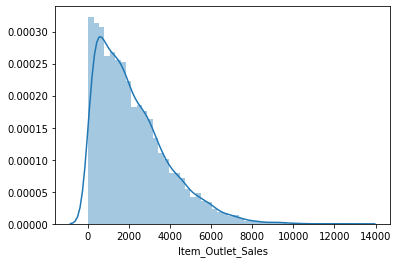

In [11]:
sns.distplot(data4['Item_Outlet_Sales'])

In [110]:
print("skewness :",data4['Item_Outlet_Sales'].skew())
print("kurtosis :",data4['Item_Outlet_Sales'].kurt())

skewness : 1.1775306028542798
kurtosis : 1.6158766814287264


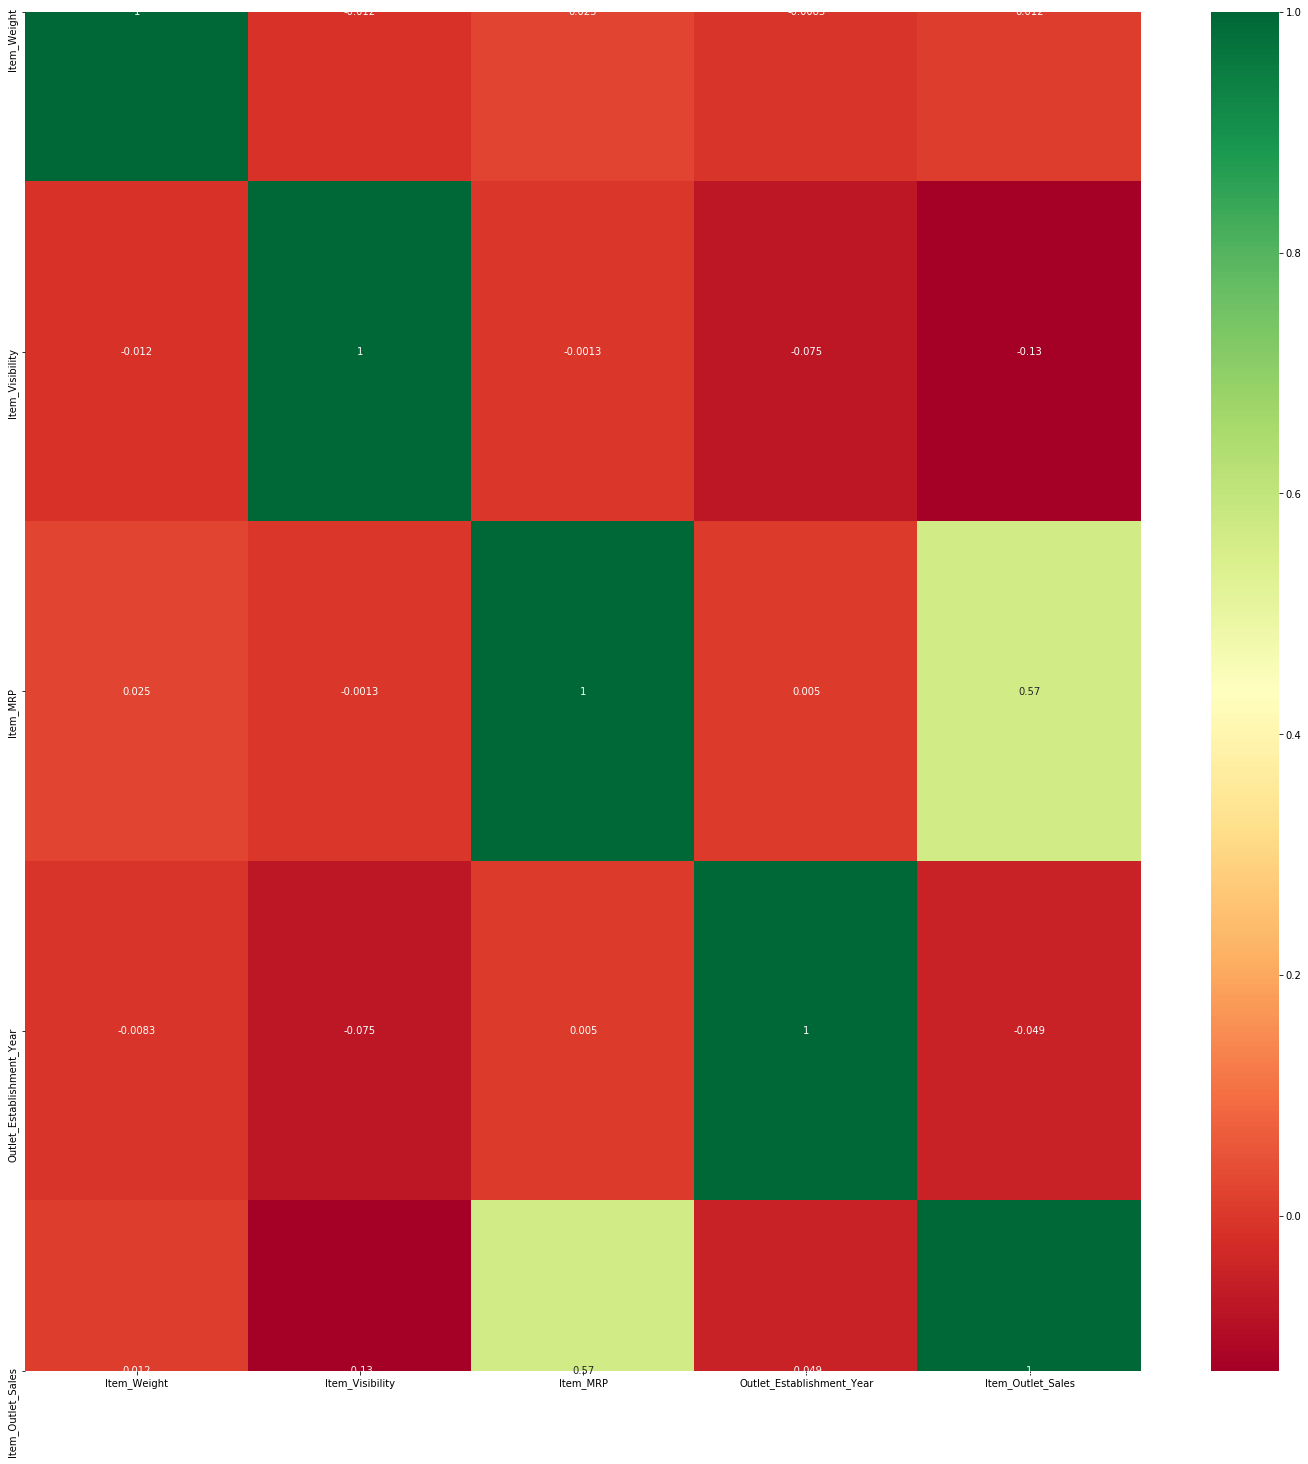

In [12]:
new_data= data4.copy()
#Finding correlation between each columns by using heatmap
plt.figure(figsize = (25,25))
sns.heatmap(new_data.corr(), cmap = "RdYlGn", annot = True)


In [13]:
#scikit-learn accepts only numerical variables, I converted all categories of nominal variables into numeric types. 
#coding all categorical variables as numeric using ‘LabelEncoder’ from sklearn’s preprocessing module.
#One-Hot-Coding refers to creating dummy variables, one for each category of a categorical variable. 
le = LabelEncoder()
enc = OneHotEncoder()
label = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year']
one = ['Outlet_Size','Outlet_Location_Type','Outlet_Type']
for col in label:
    data4[col]=le.fit_transform(data4[col]) 
for col in one:
    data4[col]=le.fit_transform(data4[col]) 
data4

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,4,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,8,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,4,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,3,1,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,5,1,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,6,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,8,1,2,2,1845.5976


In [14]:
#remove outliers from the df
def remove_outlier(data,column):
    Q3 = data4[column].quantile(.75)
    Q1 = data4[column].quantile(.25)
    IQR = Q3-Q1
    data4 = data4[~((data4[column] < (Q1 - 1.5 * IQR)) |(data4[column] > (Q3 + 1.5 * IQR)))]
    return data4

In [15]:
#Splitting the dataset

train, test = train_test_split(data4, test_size=0.2)
print(train ,"\n \n   Data spilt for training set:" ,len(train))
print("-------------------------------------------------------------------")
print(test , "\n data split for test data is",len(test))

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
5279             1155     6.550000                 2         0.034604   
6617              603    13.800000                 2         0.014763   
4004              931    12.857645                 2         0.144338   
3796               23     9.800000                 1         0.013830   
4617               63    12.100000                 1         0.011558   
...               ...          ...               ...              ...   
8234              726     6.785000                 2         0.042154   
951               281    19.350000                 1         0.016598   
248               606    10.100000                 1         0.027106   
4955              313    16.200000                 1         0.074019   
6276              826    18.250000                 1         0.077845   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
5279          1  157.8288                  8    

In [59]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
#Initializing the variables
X =train.drop(['Item_Outlet_Sales'], axis = 1) 
x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales, test_size =0.2)

In [60]:

#.fit(), you calculate the optimal values of the weights b0 and b1, using the existing input and output (x and y) as the arguments. In other words, .fit() fits the model. 
#It returns self, which is the variable model itself. 
lreg.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
# predicting on cv
pred_cv = lreg.predict(x_cv)
print('pridicting on cross validation:',pred_cv)




pridicting on cross validation: [1361.92741078 2063.10032686 1977.47480777 ... 1802.85239613 1997.80278653
 2512.26555443]


In [62]:

coff = model.score(X,y)
print('Coefficent of determination:',coff)
y_pred = lreg.predict(X)
print('predicted response:', y_pred, sep='\n')


Coefficent of determination: 0.5046686975795331
predicted response:
[2480.8052083  1526.18800447 4077.53567299 ... 1596.68383715 -894.0656792
 4443.66966693]


In [63]:
y_pred = model.predict(x_cv)
print('predicted response:', y_pred, sep='\n')



predicted response:
[1293.22834548 2136.77594597 1989.44978794 ... 1889.16779193 2142.62322214
 2599.50847532]


In [64]:
#R^2 (coefficient of determination) regression score function.,R2.score is made for continous variables, so for regression problems
r2_score(y_cv, y_pred)


0.5034433759415429

Text(0.5, 1.0, 'Residual plot')

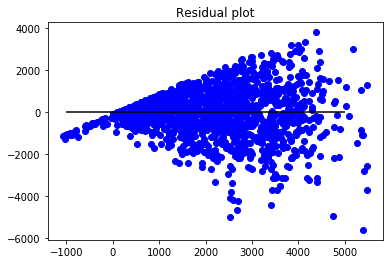

In [66]:
#residual plot
#Interpretation of Regression Plots.
#residual vs fitted values plot.
x_plot = plt.scatter(pred_cv, (pred_cv - y_cv), c='b')

plt.hlines(y=0, xmin= -1000, xmax=5000)

plt.title('Residual plot')